<a href="https://colab.research.google.com/github/KaterynaHalosa/Projects/blob/main/Python_Data_Analysis_Project_(COVID_19_Impact_on_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPACT OF COVID-19 ON DIGITAL LEARNING

# Description

The **COVID-19 Pandemic** has disrupted learning for more than 56 million students in the United States. In the Spring of 2020, most states and local governments across the U.S. **closed educational institutions** to stop the spread of the virus. In response, schools and teachers have attempted to reach students **remotely** through distance learning tools and digital platforms. Until today, concerns of the exacaberting digital divide and long-term learning loss among America’s most vulnerable learners continue to grow.

**Digital learning** is an educational method that uses digital devices with a system in which students learn using online resources to adapt technology in the class.


# Problem Statement

From 2014 education technology company **LearnPlatform** provides students and teachers by equitable access to education technology. That effectiveness system is known as digital learning is used by huge number of districts and states in USA, so the company has an access to big evident basis that shows how educational system really works.

For decades government plans and policies tried to make education more equitable, but still **not every student has equal opportunities to learn**. Last research confirms this and shows that educational outcomes are far from equitable also due to COVID-19 pandemic.


# Goals

1. Make an **Exploratory Data Analysis**.

2. Perform analysis of the **state of digital learning in 2020**, how does student engagement with online learning platforms relate to different geography, demographic context, learning context, socioeconomic status?

3. Find out how the **COVID-19 pandemic effected on online and distance learning**, how does student engagement with different types of education technology change over the course of the pandemic?


# PREPARATIONS

# Importing libraries

In [ ]:
import pandas as pd
import plotly.express as px
from textwrap import wrap

import seaborn as sns
import missingno as msno
%matplotlib inline

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import style

import os
import glob

# Reading data files

In [ ]:
from google.colab import files
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/PROJECT (LearnPlatform COVID-19 Impact on Digital Learning)/learnplatform-covid19-impact-on-digital-learning.zip', 'r') as zipobj:
  zipobj.extractall('/content/drive/MyDrive/PROJECT (LearnPlatform COVID-19 Impact on Digital Learning)')

# KNOWING THE DATA

# `products_info.csv`
This file includes information about the characteristics of the top 372 products with most users in 2020. The categories listed in this file are part of LearnPlatform's product taxonomy.

The `URL` column will be dropped during cleaning the data, because it is not importable.

| Name | Description |
| :--- | :----------- |
| LP ID| The unique identifier of the product |
| URL | Web Link to the specific product |
| Product Name | Name of the specific product |
| Provider/Company Name | Name of the product provider |
| Sector(s) | Sector of education where the product is used |
| Primary Essential Function | The basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories: LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations. Each of these categories have multiple sub-categories with which the products were labeled |

In [ ]:
products_df_undropped = pd.read_csv('/content/drive/MyDrive/PROJECT (LearnPlatform COVID-19 Impact on Digital Learning)/products_info.csv')
products_df_undropped.head()


,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


# `districts_info.csv`

The district file includes information about the characteristics of school districts, including data from:
* NCES (2018-19);
* FCC (Dec 2018);
* Edunomics Lab.

Additionally, there are many missing data marked as 'NaN' indicating that the data was suppressed to maximize anonymization of the dataset.

Such columns as `pct_black/hispanic`, `pct_free/reduced`, `county_connections_ratio` will be dropped during cleaning the data, because they don't influence on the main data analysis.



| Name | Description |
| :--- | :----------- |
| district_id | The unique identifier of the school district |
| state | The state where the district resides in |
| locale | NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural. See [Locale Boundaries User's Manual](https://eric.ed.gov/?id=ED577162) for more information. |
| pct_black/hispanic | Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data |
| pct_free/reduced | Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data |
| county_connections_ratio | `ratio` (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version). See [FCC data](https://www.fcc.gov/form-477-county-data-internet-access-services) for more information. |
| pp_total_raw | Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district. |

In [ ]:
districts_df_undropped = pd.read_csv('/content/drive/MyDrive/PROJECT (LearnPlatform COVID-19 Impact on Digital Learning)/districts_info.csv')
districts_df_undropped.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


# `engagement_data`

Each file in the folder represents data from one school district.


The 4-digit file name represents `district_id` which can be used to link to district information in `district_info.csv`.

The `lp_id` can be used to link to product information in `product_info.csv`.


| Name | Description |
| :--- | :----------- |
| time | date in "YYYY-MM-DD" |
| lp_id | The unique identifier of the product |
| pct_access | Percentage of students in the district have at least one page-load event of a given product and on a given day |
| engagement_index | Total page-load events per one thousand students of a given product and on a given day |

In [ ]:
file_path = '/content/drive/MyDrive/PROJECT (LearnPlatform COVID-19 Impact on Digital Learning)/engagement_data'
all_files = glob.glob(file_path + "/*.csv")

new_list = []

for filename in all_files:
    df = pd.read_csv(filename, header=0)
    district_id = filename.split("/")[6].split(".")[0]
    df["district_id"] = district_id
    new_list.append(df)

engagement_df_undropped = pd.concat(new_list)
engagement_df_undropped.head()

# index_col=None, engagement_df = engagement_df.reset_index(drop=True)

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,16401.0,0.00,NaN,1142
1,2020-01-01,99916.0,0.37,11.24,1142
2,2020-01-01,26488.0,0.00,NaN,1142
3,2020-01-01,29322.0,0.00,NaN,1142
4,2020-01-01,69827.0,0.37,18.73,1142


# Missing Values

There are used two methods of finding missing values in the Data Frames: through `.isna()` method and `missingno` library for missing values visualization.

Following research shows that biggest percent of missing values is in `Districts Data Frame`, the lowest score has `Products Data Frame`.

In [ ]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

def missing_values(df, name):

  tot = str(df.isna().sum().sum())

  print(color.BOLD + 'Missing values of ' + name + ':' + color.END +'\n')
  print('Total number: ' + color.BOLD + tot + color.END + '\n')

  number_missing = df.isna().sum().sort_values(ascending=False)
  percent_missing = df.isna().sum() * 100 / len(df)

  mv_products = pd.concat([number_missing, percent_missing.round(2)], axis=1, keys=['Total', 'Percent'])
  print(mv_products, '\n\n')

missing_values(products_df_undropped, 'Products Data Frame')
missing_values(districts_df_undropped, 'Districts Data Frame')
missing_values(engagement_df_undropped, 'Engagement Data Frame')

Missing values of Products Data Frame:

Total number: 41

                            Total  Percent
Sector(s)                      20     5.38
Primary Essential Function     20     5.38
Provider/Company Name           1     0.27
LP ID                           0     0.00
URL                             0     0.00
Product Name                    0     0.00 


Missing values of Districts Data Frame:

Total number: 442

                          Total  Percent
pp_total_raw                115    49.36
pct_free/reduced             85    36.48
county_connections_ratio     71    30.47
state                        57    24.46
locale                       57    24.46
pct_black/hispanic           57    24.46
district_id                   0     0.00 


Missing values of Engagement Data Frame:

Total number: 5392397

                    Total  Percent
engagement_index  5378409    24.09
pct_access          13447     0.06
lp_id                 541     0.00
time                    0     0.00
distric

In [ ]:
def missing_values_bar(df, c):
   msno.bar(df, color=c, sort="ascending", figsize=(7,3), fontsize=10)

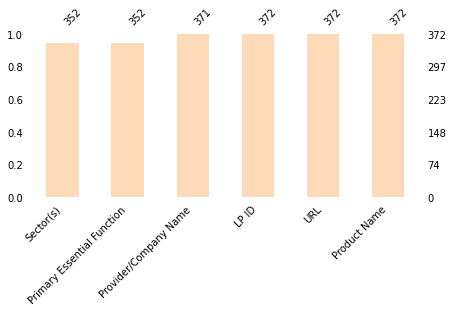

In [ ]:
missing_values_bar(products_df_undropped, 'peachpuff')

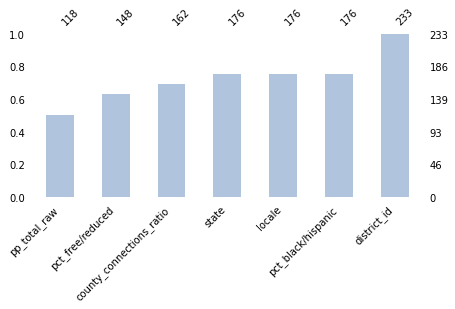

In [ ]:
missing_values_bar(districts_df_undropped, 'lightsteelblue')

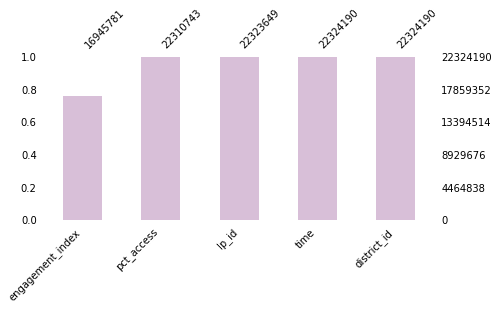

In [ ]:
missing_values_bar(engagement_df_undropped, 'thistle')

# CLEANING THE DATA

# Drop columns


Nex columns were dropped from `Districts Data Frame`: `pct_black/hispanic`, `pct_free/reduced`, `county_connections_ratio`. There are two reasons:

* they have the highest persent of missing values: `pct_black/hispanic` - 49.36%, `pct_free/reduced` - 36.48%, `county_connections_ratio` - 30.47%;

* also `pct_black/hispanic` and `pct_free/reduced` columns are insignificant for such type of research.

Column `URL` was dropped from `Products Data Frame` because it doesn't consict important information.

In [ ]:
products_df = products_df_undropped.drop(['URL'], axis=1)
districts_df = districts_df_undropped.drop(['pct_black/hispanic', 'pct_free/reduced', 'county_connections_ratio'], axis=1)

products_df.head()

,LP ID,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [ ]:
districts_df.head()

,district_id,state,locale,pp_total_raw
0,8815,Illinois,Suburb,"[14000, 16000["
1,2685,NaN,NaN,NaN
2,4921,Utah,Suburb,"[6000, 8000["
3,3188,NaN,NaN,NaN
4,2238,NaN,NaN,NaN


# Drop certain rows

To continue clean the data was used method `.dropna()` - rows with NaN values in both essential columns `engagement_index` and `pct_access` were deleted.

In [ ]:
engagement_df = engagement_df_undropped.dropna(subset=['engagement_index', 'pct_access'], how='all')

# Filling missing values

There is no point to fill `Products` and `Districts Data Frames` with mean or median data, because it doesn't include numerical values.

In `Engagement Data Frame` there are not possibility to fill `lp_id` values, because it is **linking data**, which merge this data frame with other.

But we can fill `engagement_index` and `pct_access`  by median numbers. Not mean because it is computed by adding up all the values and dividing that score by the number of values, but the Median is the number found at the exact middle of the set of values.

**Mean can not be used** because these columns consist diverse values.



In [ ]:
engagement_df[['engagement_index', 'pct_access']] = engagement_df[['engagement_index', 'pct_access']].fillna(engagement_df[['engagement_index', 'pct_access']].median())



/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


# Missing Values Picture Check

In [ ]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

def missing_values(df, name):

  tot = str(df.isna().sum().sum())

  print(color.BOLD + 'Missing values of ' + name + ':' + color.END +'\n')
  print('Total number: ' + color.BOLD + tot + color.END + '\n')

  number_missing = df.isna().sum().sort_values(ascending=False)
  percent_missing = df.isna().sum() * 100 / len(df)

  mv_products = pd.concat([number_missing, percent_missing.round(2)], axis=1, keys=['Total', 'Percent'])
  print(mv_products, '\n\n')

missing_values(products_df, 'Products Data Frame')
missing_values(districts_df, 'Districts Data Frame')
missing_values(engagement_df, 'Engagement Data Frame')

Missing values of Products Data Frame:

Total number: 41

                            Total  Percent
Sector(s)                      20     5.38
Primary Essential Function     20     5.38
Provider/Company Name           1     0.27
LP ID                           0     0.00
Product Name                    0     0.00 


Missing values of Districts Data Frame:

Total number: 229

              Total  Percent
pp_total_raw    115    49.36
state            57    24.46
locale           57    24.46
district_id       0     0.00 


Missing values of Engagement Data Frame:

Total number: 541

                  Total  Percent
lp_id               541      0.0
time                  0      0.0
pct_access            0      0.0
engagement_index      0      0.0
district_id           0      0.0 




# DATA VISUALIZATION AND ANALYSIS

# Bar Chart 'Districts per State Distribution'

Following bar graph shows number of districts in different states of America which take part in a search. Majority of them belong to Connecticut, Utah, Massachusetts, Illinois and California.

Text(0, 0.5, 'State')

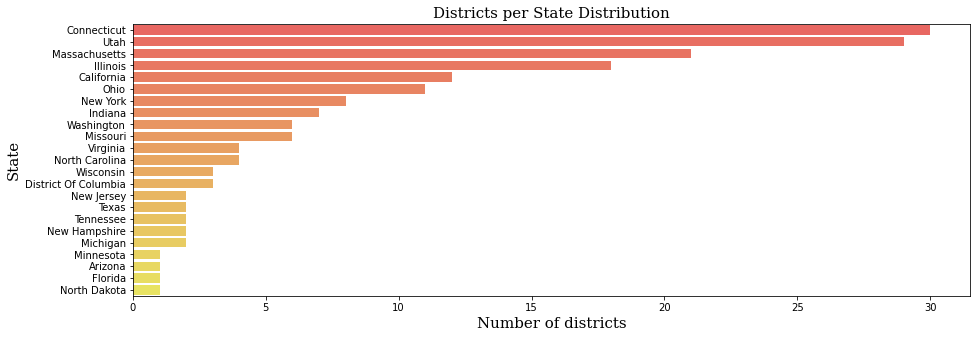

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(y='state', data=districts_df, alpha=0.7, order=districts_df['state'].value_counts().index, palette='autumn')
plt.title('Districts per State Distribution', fontsize=15, family='serif')
plt.xlabel('Number of districts', fontsize=15, family='serif')
plt.ylabel('State', fontsize=15, family='serif')


# Donut Chart 'Locale Distribution'

There are 4 unique values in `districts_df['locale']` such as: suburban, town, city and rural. Let's look at it's distribution!

Next graph shows the biggest number of all districts are located in **suburbs (59%)** and the lowest are in **towns (6%)**.

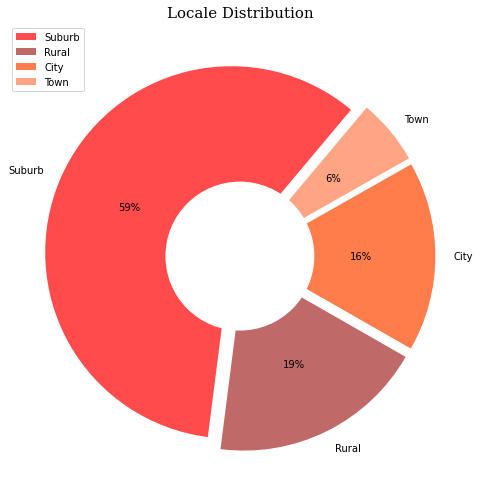

In [ ]:
plt.subplots(figsize=(7, 7))
n_locales = list(districts_df['locale'].value_counts().index)
plt.pie(x=districts_df.locale.value_counts().values, labels=n_locales, startangle=50, wedgeprops = {"alpha": 0.7}, colors=['red', 'brown', 'orangered', 'coral'], radius=1, autopct='%1.0f%%', explode=[.05, .05, .05, .05])
plt.title('Locale Distribution', fontsize=15, family='serif')

plt.gca().add_artist(plt.Circle(xy=(0, 0), radius=.4, facecolor='white'))

plt.tight_layout()
plt.legend(loc='upper left')


# Bar Chart 'Rating of Provider/Company Names'

Below is shown distribution between companies that provide education services.

Here are three leaders: Google LLC, Houghton Mifflin Harcourt and Microsoft.

Text(0, 0.5, 'Provider/Company Name')

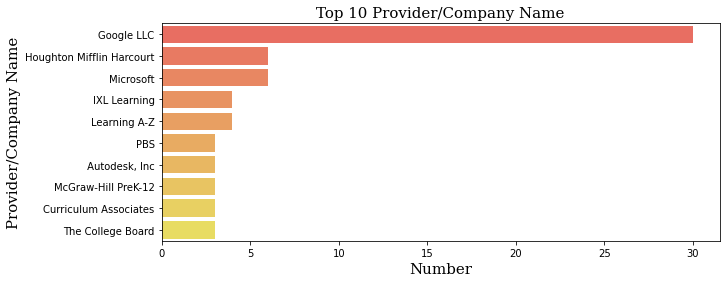

In [ ]:
plt.subplots(figsize=(10, 4))
sns.countplot(y='Provider/Company Name', data=products_df, alpha=0.7, order=products_df['Provider/Company Name'].value_counts().index[:10], palette='autumn')
plt.title('Top 10 Provider/Company Name', fontsize=15, family='serif')
plt.xlabel('Number', fontsize=15, family='serif')
plt.ylabel('Provider/Company Name', fontsize=15, family='serif')



# Donut Chart 'Sector Distribution of product'

It was necessary to **split data** of `Sector(s)` in `Products Data Frame` column to make correct seach.

Sector of education where the product is used.

On the following picture we can see three main sectors of education where the products is used: `Prek-12` (Early childhood, usually 3-year-olds through 12th grade students), `Higher Ed` and `Corporate`.



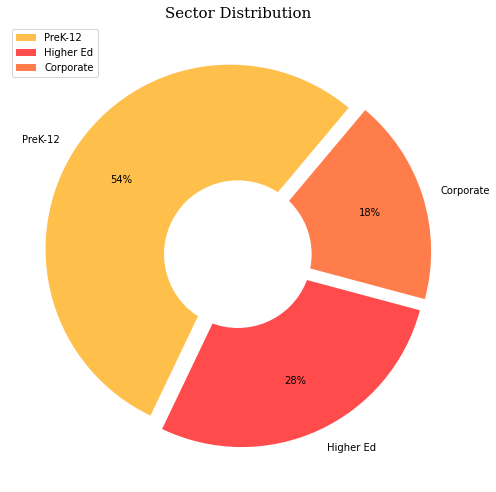

In [ ]:
c1=c2=c3=0
for s in products_df["Sector(s)"]:
    if(not pd.isnull(s)):
        s = s.split(";")
        for i in range(len(s)):
            sub = s[i].strip()
            if(sub == 'PreK-12'): c1+=1
            if(sub == 'Higher Ed'): c2+=1
            if(sub == 'Corporate'): c3+=1

plt.subplots(figsize=(7, 7))
labels = ['PreK-12','Higher Ed','Corporate']
sizes = [c1,c2, c3]
plt.pie(sizes, labels=labels, startangle=50, autopct='%1.0f%%', wedgeprops = {"alpha": 0.7}, pctdistance=0.7, radius=1, colors=["orange","red","orangered"], explode = [0.05, 0.05, 0.05])
plt.title('Sector Distribution', fontsize = 15, family='serif')

plt.gca().add_artist(plt.Circle(xy=(0, 0), radius=.4,facecolor='white'))

plt.tight_layout()
plt.legend(loc='upper left')



# Primary Essential Function split

📝  Primary Essential Function of Products Data Frame has two types of values: main and narrow. Further they will be called 'main' and 'sub'. It is better to devide `'Primary Essential Function'` column into to: `primary_essential_main` and `primary_essential_sub`.

In [ ]:
main_function = []
sub_function = []
for s in products_df['Primary Essential Function']:
    if(not pd.isnull(s)):
        s1 = s.split("-",1)[0].strip()
        main_function.append(s1)
    else:
        main_function.append(np.nan)

    if(not pd.isnull(s)):
        s2 = s.split("-",1)[1].strip()
        sub_function.append(s2)
    else:
        sub_function.append(np.nan)

products_df['main_function'] = main_function
products_df['sub_function'] = sub_function

products_df.head()

,LP ID,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,main_function,sub_function
0,13117,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms
1,66933,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms
2,50479,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si...",LC,"Sites, Resources & Reference - Games & Simulat..."
3,92993,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms,LC,Digital Learning Platforms
4,73104,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms


# Donut Chart 'Main Function of product'

There are three main functions of products:  `LC` - Learning & Curriculum, `CM` - Classroom Management, and `SDO` - School & District Operations.

Below we see that most products have a function of **Learning & Curriculum - 75%**.

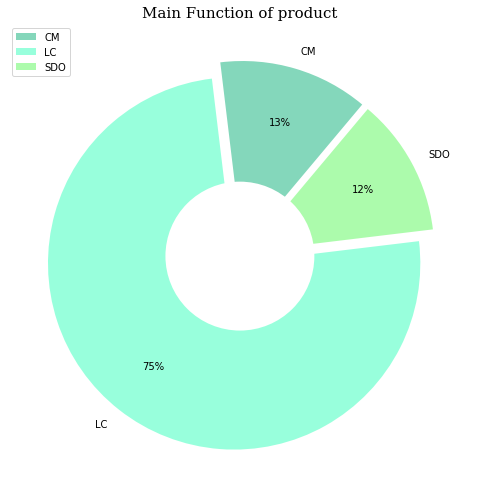

In [ ]:
c1=c2=c3=0
for s in products_df['main_function']:
    if(not pd.isnull(s)):
        c1 += s.count("CM")
        c2 += s.count("LC")
        c3 += s.count("SDO")

plt.subplots(figsize=(7, 7))
labels1 = ['CM','LC','SDO']
sizes = [c1, c2, c3]
plt.pie(sizes, labels=labels1, startangle=50, autopct='%1.0f%%', wedgeprops = {"alpha": 0.8}, pctdistance=0.7, radius=1, explode = [0.05, 0.05, 0.05], colors=["mediumaquamarine", "aquamarine", "palegreen"])
plt.title('Main Function of product', fontsize = 15, family='serif')

plt.gca().add_artist(plt.Circle(xy=(0, 0), radius=.4,facecolor='white'))

plt.tight_layout()
plt.legend(loc='upper left')

# Bar Chart 'Secondary Function of product'

The most popular secondary functions of the product are **Digital Learning Platforms**.

Text(0.5, 1.0, 'Secondary Function of product')

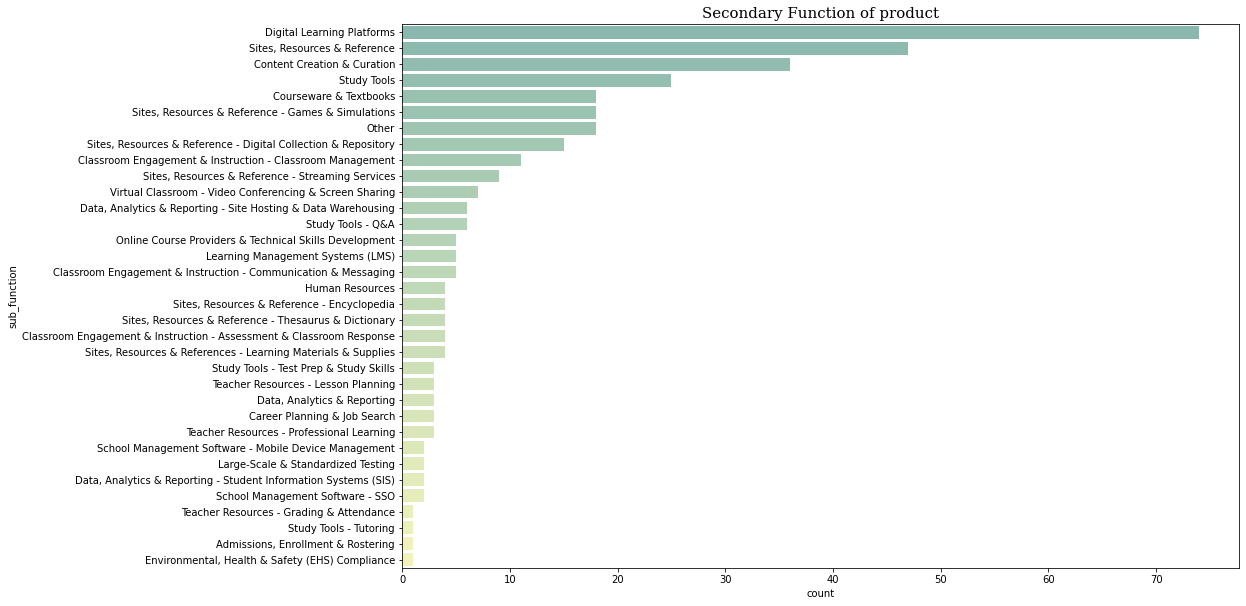

In [ ]:
plt.subplots(figsize=(15, 10))
sns.countplot(y='sub_function', data=products_df, alpha=0.5, order=products_df['sub_function'].value_counts().index, palette='summer')
plt.title('Secondary Function of product', fontsize=15, family='serif')



#  MERGING FILES

In order to make the necessary visualisation and analysis, the data frames need to be merged.

# Convert a string column to Date Time

This is the first step before merging frames: convert the `time' data to the correct form.

Method **pd.to_datetime()** was used.

In [ ]:
engagement_df['time'] = pd.to_datetime(engagement_df['time'])

<ipython-input-24-0d1fc5cc9656>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engagement_df['time'] = pd.to_datetime(engagement_df['time'])


In [ ]:
print(engagement_df['time'].sort_values())

0        2020-01-01
124      2020-01-01
125      2020-01-01
126      2020-01-01
127      2020-01-01
            ...    
140213   2020-12-31
140214   2020-12-31
140215   2020-12-31
140209   2020-12-31
98449    2020-12-31
Name: time, Length: 22310743, dtype: datetime64[ns]


# Merging district and engagement data frames

These two frames have one common **key value** - `district id`.

District and engagement data frames were were chosen to be combined because **these two data frames together can show the necessary information** after visualisation.

In [ ]:
print(districts_df["district_id"].nunique())
print(engagement_df["district_id"].nunique())

233
233


In [ ]:
engagement_df['district_id'] = engagement_df['district_id'].astype(int)

<ipython-input-27-684b9f541b41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engagement_df['district_id'] = engagement_df['district_id'].astype(int)


In [ ]:
districts_engagement_data = pd.merge(districts_df, engagement_df, left_on='district_id', right_on='district_id')
districts_engagement_data.head()

,district_id,state,locale,pp_total_raw,time,lp_id,pct_access,engagement_index
0,8815,Illinois,Suburb,"[14000, 16000[",2020-01-27,32213.0,100.00,3000.00
1,8815,Illinois,Suburb,"[14000, 16000[",2020-02-25,90153.0,33.33,2666.67
2,8815,Illinois,Suburb,"[14000, 16000[",2020-02-25,99916.0,0.00,1.92
3,8815,Illinois,Suburb,"[14000, 16000[",2020-02-25,28504.0,0.00,1.92
4,8815,Illinois,Suburb,"[14000, 16000[",2020-02-25,95731.0,33.33,333.33


# Merging products and engagement data frames

Two frames below have one common **key value** - `lp id`.

In [ ]:
print(products_df["LP ID"].nunique())
print(engagement_df["lp_id"].nunique())

372
8646


In [ ]:
products_engagement_data = pd.merge(products_df, engagement_df, left_on='LP ID', right_on='lp_id')
products_engagement_data.head()

,LP ID,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,main_function,sub_function,time,lp_id,pct_access,engagement_index,district_id
0,13117,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-01-07,13117.0,2.61,141.79,1142
1,13117,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-01-08,13117.0,0.00,1.92,1142
2,13117,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-01-09,13117.0,1.87,119.40,1142
3,13117,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-01-13,13117.0,2.99,264.93,1142
4,13117,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-01-14,13117.0,3.35,230.48,1142


# Line Plots


In [ ]:
def plot_time_series(df,col1,col2,col3):
    max_list = df[[col1,col2]].groupby([col1])[col2].mean().sort_values(ascending=False).index[:5].tolist()
# группируем по штату, среднее арифметическое значение вовлеченности, сортируем от самого большого средн. арифметического, выбираем пять самых верхних.

    df = df[df[col1].isin(max_list)].reset_index(drop=True)[[col3, col1, col2]]
    df = df.pivot_table(index=col3, columns=col1, values=col2)

    fig = px.line(df, facet_col=col1, facet_col_wrap=1, width=1500, height=800)
    fig.update_layout(
                      title=(col1 + " , " + col2 + " , " + col3).title(),
                      title_x=0.39,
                      template="plotly_white",
                      paper_bgcolor='#f5f7f8',
                      font = {'family': 'Serif', 'size': 20}
                     )
    fig.show()

# Dependence of the pct_access and engagement_index on the state throughout the 2020

* `pct_access`	- Percentage of students in the district have at least one page-load event of a given product and on a given day.

* `engagement_index` -	Total page-load events per one thousand students of a given product and on a given day.

Below we can see two plots of merged data frames: districts and engagement data.
Here are five states with highest mean indicators of `pct_access` and `engagement_index`.

**General**

The highest rate is located in Arizona state in August and September. We can see the same trend in other states, where the highest rates of `engagement_index` and `pct_access` occur between summer and autumn, which can be explained by the beginning of the winter semester.

The longest lowest rate persists during the following months: June, July and early August. Which is most likely due to the summer holidays.

**Serrations**

In addition, we can see that our graph line has cogs, which is explained by the high degree of indicators variation on different days of the week. The line rises on weekdays, while at weekends we see a significant drop.

**Impact of the COVID-19**

The following graphs also show an increase in involvement at the beginning and throughout the winter term, compared to the summer term when the pandemic was only getting worse.

In some states, such as Arizona and New Hampshire, there is a doubling of the `engagement_index` and `pct_access` figures.


In [ ]:
plot_time_series(districts_engagement_data,"state","pct_access","time")

In [ ]:
plot_time_series(districts_engagement_data,"state","engagement_index","time")

# Dependence of the pct_access and engagement_index on the locality throughout the 2020

* pct_access - Percentage of students in the district have at least one page-load event of a given product and on a given day.

* engagement_index - Total page-load events per one thousand students of a given product and on a given day.


In the following graphs if we look at the `engagement_index` and `pct_access` in terms of user location, we can only see an increase in the cities. In the rural, suburbs and towns the figures take on roughly the same values.

But we also see a common trend with previous graphs - decreasing in the figures during the summer holidays.

In [ ]:
plot_time_series(districts_engagement_data,"locale","pct_access","time")

In [ ]:
plot_time_series(districts_engagement_data,"locale","engagement_index","time")

# Users engagement depending on the company throughout 2020

**General**

In the following charts we see the top five companies in terms of the mean of `engagement_index` and `pct_access` supplying digital learning products:

* `pct_access` - 'ClassLink', 'Clever', 'Google LLC', 'Instructure, Inc.', 'ZOOM VIDEO COMMUNICATIONS, INC.'
* `engagement_index` - 'ClassLink', 'Google LLC', 'Instructure, Inc.', 'Kahoot! AS', 'Schoology'

**Impact of the COVID-19**

On average we see an upward trend in engagement by the end of 2020, but we also see companies where the index is falling, such as 'Kahoot! AS'.

Then there are companies like 'ZOOM', which had almost no activity until mid-March 2020 but then `engagement_index` and `pct_access` reached impressive heights.


In [ ]:
plot_time_series(products_engagement_data, 'Provider/Company Name', 'pct_access', 'time')

In [ ]:
plot_time_series(products_engagement_data, 'Provider/Company Name', 'engagement_index' , 'time')

# Users engagement depending on the sector of education throughout 2020

`Sector(s)`	- Sector of education where the product is used.

In the next two graphs, we see that the highest engagement rates are shown by products with a mixed type - PreK-12, Higher Ed and Corporate.

This sector alone shows an increase in engagement by the end of 2020.

In [ ]:
plot_time_series(products_engagement_data, 'Sector(s)', 'pct_access', 'time')

In [ ]:
plot_time_series(products_engagement_data, 'Sector(s)', 'engagement_index', 'time')

# Dependence of the pct_access and engagement_index on the main function of the product throughout 2020

There are three main functions of products: `LC` - Learning & Curriculum, `CM` - Classroom Management, and `SDO` - School & District Operations. Also, they can be mixed.

The increase in engagement is seen in products with next main functions: `CM` and `SDO`.


In [ ]:
plot_time_series(products_engagement_data, 'main_function', 'pct_access', 'time')

In [ ]:
plot_time_series(products_engagement_data, 'main_function', 'engagement_index', 'time')

# Dependence of the pct_access and engagement_index on the secondary function of the product throughout 2020

**Impact of COVID-19**

Here we can see an increase in involvement in almost all secondary functions. But it is worth paying special attention to Learning Management System (LMS), Virtual Classroom and Online Course Providers secondary functions, where the involvement has increased significantly by the end of 2020.

In [ ]:
plot_time_series(products_engagement_data, 'sub_function', 'pct_access', 'time')

In [ ]:
plot_time_series(products_engagement_data, 'sub_function', 'engagement_index', 'time')

# CONCLUSIONS

The following work has been done in this project:
1. An introduction was written and the problem statement established.
2. Were made preparations for working with the data such as: importing libraries, unzipping and reading data files.
3. A successful familiarisation with the data was done. Two data frames were explored: `products_info.csv`, `districts_info.csv` and one file `engagement_data`, which has been converted into csv format.
4. Cleaning the data: identification of missing values and it's filling, dropping columns.
5. Merging 2 data frames were made with a switching string time to data time.
6. Performed data visualization and analysis. Were made 3 Donut Charts, 3 Bar Charts and 12 Line Plots.

The `engagement_index` and `pct_access` was found to increase in most states in the second half of 2020.

In terms of user location, there is an increase only in the cities. In the rural, suburbs and towns the figures take on roughly the same values.

When it comes to sectors, the highest engagement rates are shown by products with a mixed type - PreK-12, Higher Ed and Corporate. Which is logical, as universal applications are more likely to be used by different users: children or adults, students or employees.

The increase in engagement is seen in products with next main functions: CM - Classroom Management, and SDO - School & District Operations, they are also the leaders in terms of the highest engagement rates in 2020. This is explained by the transition of educational institutions to distance learning.

All secondary functions showed an increase in involvement. But it is worth paying special attention to Learning Management System (LMS), Virtual Classroom and Online Course Providers secondary functions, where the involvement has increased significantly by the end of 2020.